In [1]:

import plotly.graph_objs as go
import pandas as pd
df = pd.read_csv('Hospitals.csv')


In [2]:
df.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-94.945477,29.747620,8497,76777520,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...,1700 JAMES BOWIE DRIVE,BAYTOWN,TX,77520,NOT AVAILABLE,...,2017-12-18T00:00:00.000Z,http://www.houstonmethodist.org/locations/san-...,NOT AVAILABLE,NOT AVAILABLE,48.0,NON-PROFIT,-999.0,182.0,NOT AVAILABLE,Y
1,-82.881843,40.027143,8498,129043230,"WOODS AT PARKSIDE,THE",349 OLDE RIDENOUR ROAD,COLUMBUS,OH,43230,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.thewoodsatparkside.com/,1815,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,50.0,NOT AVAILABLE,NOT AVAILABLE
2,-84.168027,39.774242,8499,130045404,DAYTON CHILDREN'S HOSPITAL,ONE CHILDRENS PLAZA,DAYTON,OH,45404,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.childrensdayton.org/cms/home/index....,1411,NOT AVAILABLE,39.0,NON-PROFIT,-999.0,155.0,PEDIATRIC LEVEL II,Y
3,-80.632972,41.005169,8500,128844512,VIBRA HOSPITAL OF MAHONING VALLEY,8049 SOUTH AVENUE,BOARDMAN,OH,44512,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.mahoningvalleyhospital.com/,1428,MAHONING VALLEY HOSPITAL BOARDMAN CAMPUS,39.0,PROPRIETARY,-999.0,45.0,NOT AVAILABLE,NOT AVAILABLE
4,-84.199398,39.747740,8501,129845417,HAVEN BEHAVIORAL SENIOR CARE OF DAYTON,"ONE ELIZABETH PLACE,E3 SUITE A",DAYTON,OH,45417,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,https://dayton.havenbehavioral.com/,1506,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,32.0,NOT AVAILABLE,NOT AVAILABLE


In [5]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STATE_ID', 'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF',
       'BEDS', 'TRAUMA', 'HELIPAD'],
      dtype='object')

In [6]:
df['STATE']

0       TX
1       OH
2       OH
3       OH
4       OH
        ..
7565    OH
7566    OH
7567    OH
7568    TX
7569    TX
Name: STATE, Length: 7570, dtype: object

In [15]:
df[df["TYPE"] == "CRITICAL ACCESS"]["STATE"].value_counts()


IA    78
MN    77
NE    67
TX    65
IL    54
KS    53
MT    49
SD    42
WA    39
ND    38
OK    38
MO    36
IN    35
OH    34
CO    28
GA    28
MS    26
AR    24
KY    22
WV    21
MI    21
NY    18
WY    16
OR    15
ME    15
AZ    14
UT    13
WI    12
AK     9
VT     8
TN     8
NM     7
VA     6
AL     4
ID     4
NV     3
SC     2
NC     1
Name: STATE, dtype: int64

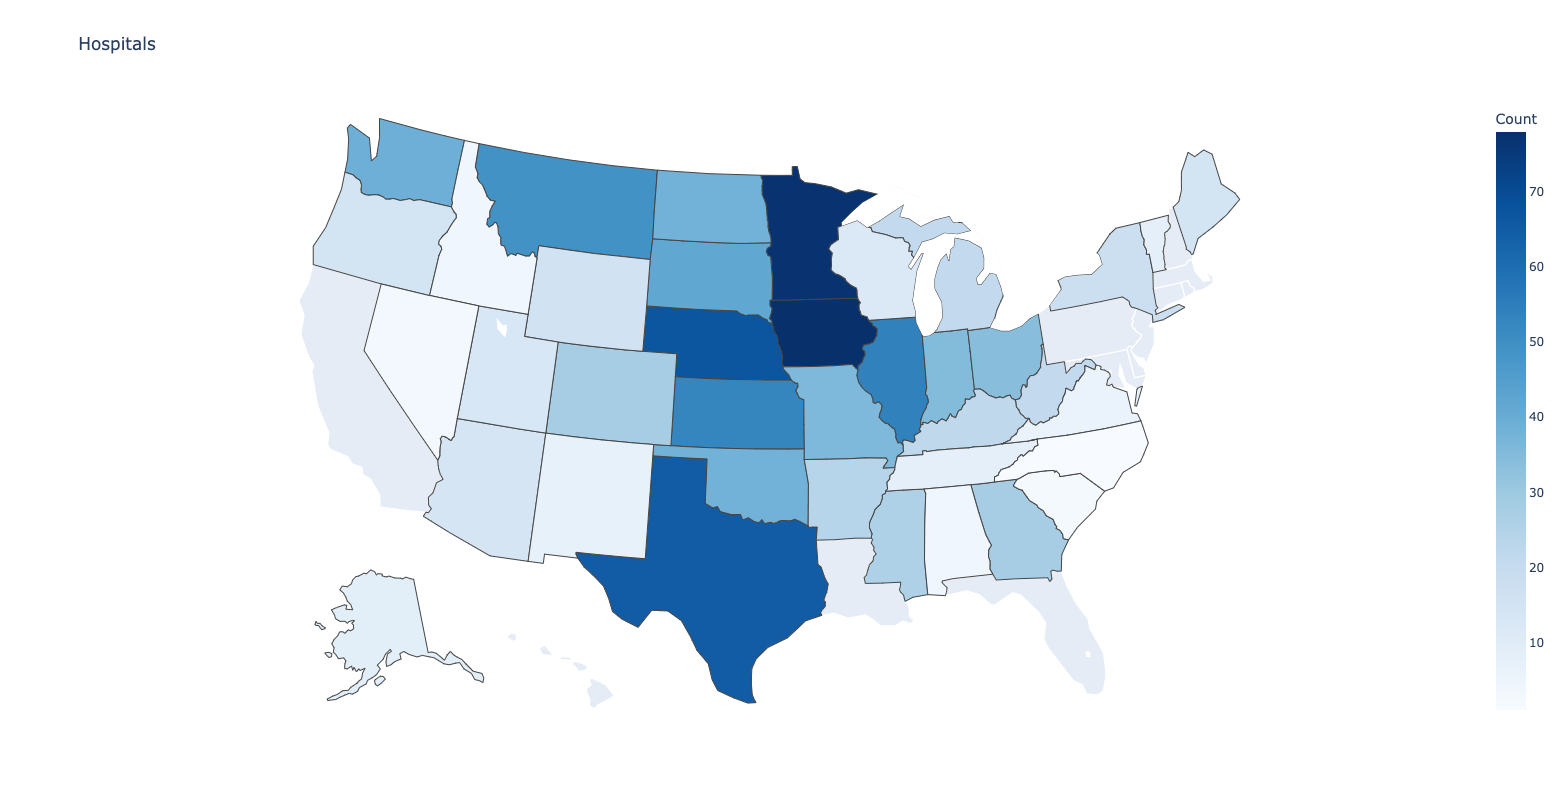

In [12]:
mygraphtitle = 'Hospitals'
mycolorscale = 'Blues' 
mycolorbartitle = "Count"
filtered_df = df[df["TYPE"] == "CRITICAL ACCESS"]["STATE"].value_counts().to_frame('value')

data=go.Choropleth(
    locations=filtered_df.index,
    locationmode = 'USA-states', 
    z = filtered_df['value'], 
    colorscale = mycolorscale,
    colorbar_title = mycolorbartitle,
)
fig = go.Figure(data)
fig.update_layout(
    title_text = mygraphtitle,
    geo_scope='usa',
    width=1200,
    height=800
)